In [2]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle
import seaborn as sns
from matplotlib import pyplot as plt

# making nn

In [16]:
den = pd.read_pickle('/home/nate/ds/metis/class_work/projects/project_luther/code/den_with_cord.pkl')

In [8]:
den.describe()

,home_price,beds,baths,house_sqft,lot_sqft,year_built,yearly_tax,min_dist
count,1.012000e+03,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,7.440964e+05,2.956522,2.775692,2353.950593,3023.604743,1983.301383,5070.839921,0.609897
std,7.029131e+05,1.383128,1.336574,1622.447420,3324.323292,36.933162,5629.952630,0.564178
min,5.000000e+04,0.000000,0.000000,120.000000,0.000000,1884.000000,0.000000,0.016355
25%,4.100000e+05,2.000000,2.000000,1310.750000,0.000000,1955.000000,1548.000000,0.231886
50%,5.842015e+05,3.000000,3.000000,1944.000000,1500.000000,2000.000000,3234.000000,0.415588
75%,7.990000e+05,4.000000,4.000000,2961.250000,6250.000000,2017.000000,7023.000000,0.848353
max,1.047500e+07,19.000000,9.000000,18696.000000,10800.000000,2019.000000,56112.000000,3.718386


In [17]:
hp_mean = den['home_price'].mean()
hp_std = den['home_price'].std()

md_mean = den['min_dist'].mean()
md_std = den['min_dist'].std()

#den = den[den.home_price > hp_mean+3*hp_std]
#den = den[den.min_dist > md_mean+3*md_std]

den = den[den['year_built'] == 2019]
den

,full_address,home_price,beds,baths,house_sqft,lot_sqft,year_built,garage_type,yearly_tax,min_dist,cords
234,"1735 Central St #408, Denver, CO 80211",415000.0,1.0,1.0,622.0,0.0,2019.0,none,5352.0,0.253957,"(39.7597317, -105.009655)"
263,"1735 Central St #406, Denver, CO 80211",549000.0,1.0,1.0,820.0,0.0,2019.0,none,7080.0,0.253957,"(39.7597317, -105.009655)"
264,"1735 Central St #501, Denver, CO 80211",1119000.0,2.0,2.0,1515.0,0.0,2019.0,none,14436.0,0.253957,"(39.7597317, -105.009655)"
286,"1735 Central St #303, Denver, CO 80211",625000.0,2.0,1.0,952.0,0.0,2019.0,none,8064.0,0.253957,"(39.7597317, -105.009655)"
586,"4200 W 17th Ave #807, Denver, CO 80204",1408000.0,2.0,3.0,1627.0,0.0,2019.0,none,18168.0,0.241976,"(39.7439557, -105.0420125)"
587,"4200 W 17th Ave #325, Denver, CO 80204",531500.0,1.0,1.0,761.0,0.0,2019.0,none,6852.0,0.241976,"(39.7439557, -105.0420125)"
588,"4200 W 17th Ave #823, Denver, CO 80204",1089000.0,2.0,2.0,1352.0,0.0,2019.0,none,14052.0,0.241976,"(39.7439557, -105.0420125)"
589,"4200 W 17th Ave #808, Denver, CO 80204",1480500.0,3.0,3.0,2026.0,0.0,2019.0,none,19104.0,0.241976,"(39.7439557, -105.0420125)"
590,"4200 W 17th Ave #1012, Denver, CO 80204",1109500.0,2.0,2.0,1251.0,0.0,2019.0,none,14316.0,0.241976,"(39.7439557, -105.0420125)"
591,"4200 W 17th Ave #341, Denver, CO 80204",789000.0,2.0,2.0,1123.0,0.0,2019.0,none,10176.0,0.241976,"(39.7439557, -105.0420125)"


In [6]:
den = den[['home_price', 'year_built', 'min_dist', 'cords']]

In [69]:
def nn_test(df, cord_col, target_col, num_nb):
    
    '''
    input: dataframe, col name for coordinates, col name for target var, number of neighbors
    
    work: 
        finds the closest num_nb houses with great_circle
        takes the mean of target_col across those houses
    
    output: dataframe with 'target_col_nn' appended
    '''
    
    cords = df[cord_col]
    n = num_nb
    
    means_col = []
    
    for house in cords:
        
        dst = []
        
        for i, neighbor in enumerate(cords):
            
            dst.append((i, great_circle(house, neighbor).miles))
        
        dst.sort(key=lambda x: x[1])
        
        mean = dst[1:(n+1)]
        
        
        targets = []
        
        for tup in mean:
            
            targets.append(df[target_col][tup[0]])
        
        
        means_col.append(sum(targets)/len(targets))
        
        
    return means_col

In [70]:
nn_hp_20 = nn_test(den, 'cords', 'home_price', 20)

KeyError: 378

In [16]:
den['nn_hp_20'] = nn_hp_20

In [17]:
den.to_pickle('/home/nate/ds/metis/class_work/projects/project_luther/code/dc_cord.pkl')

# evaluating model, graphing

In [18]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [19]:
dc = pd.read_pickle('/home/nate/ds/metis/class_work/projects/project_luther/code/dc_cord.pkl')

In [20]:
dc.describe()

,home_price,year_built,min_dist,nn_hp_5,nn_hp_10,nn_hp_15,nn_hp_20
count,9.540000e+02,954.000000,954.000000,9.540000e+02,9.540000e+02,9.540000e+02,9.540000e+02
mean,6.710949e+05,1982.085954,0.577615,6.679148e+05,6.791215e+05,6.769852e+05,6.791140e+05
std,4.289576e+05,37.112276,0.454638,3.019444e+05,2.586559e+05,2.280060e+05,2.073688e+05
min,5.000000e+04,1884.000000,0.016355,1.915798e+05,2.125600e+05,2.145933e+05,2.127650e+05
25%,4.100000e+05,1955.000000,0.226883,4.709938e+05,5.151962e+05,5.373931e+05,5.577201e+05
50%,5.770000e+05,1999.500000,0.430154,6.098695e+05,6.384599e+05,6.355150e+05,6.427075e+05
75%,7.699750e+05,2017.000000,0.842656,7.618250e+05,7.851900e+05,7.988257e+05,7.945064e+05
max,2.799000e+06,2018.000000,2.269127,1.879000e+06,1.670900e+06,1.540200e+06,1.389397e+06


In [21]:
dc['home_price'] = dc['home_price'].apply(np.log)
dc['min_dist'] = dc['min_dist'].apply(np.log)
dc['nn_hp_5'] = dc['nn_hp_5'].apply(np.log)
dc['nn_hp_10'] = dc['nn_hp_10'].apply(np.log)
dc['nn_hp_15'] = dc['nn_hp_15'].apply(np.log)
dc['nn_hp_20'] = dc['nn_hp_20'].apply(np.log)

In [22]:
dc = dc.sample(frac=1)

test = dc[:200]
dc = dc[200:]

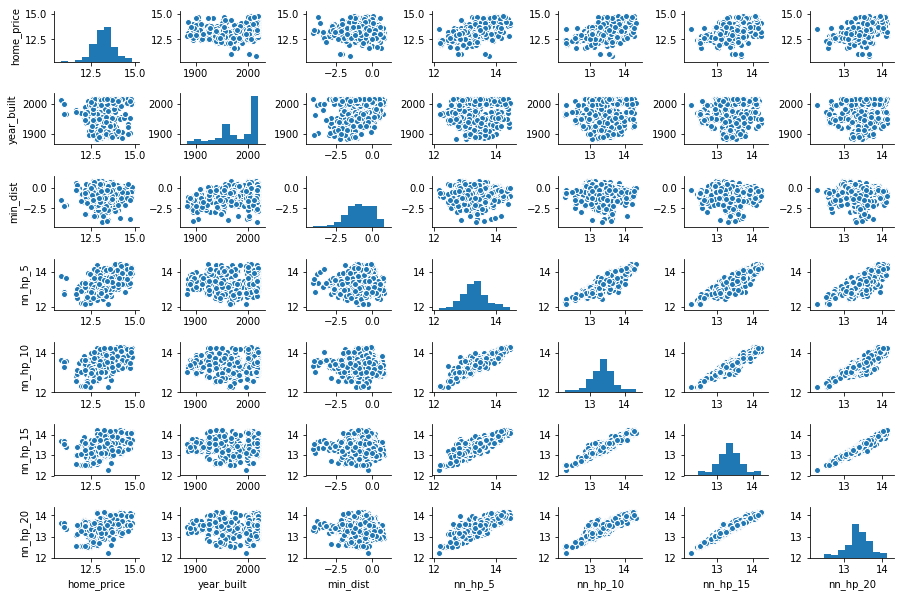

In [29]:
sns.pairplot(dc, size = 1.2, aspect=1.5)
plt.show();

In [23]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [40]:
X = np.matrix(dc[['year_built', 'min_dist', 'nn_hp_5']]).reshape(-1,3)
y = np.array(dc['home_price'])

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     163.6691
sst:     251.1944
r^2:     0.3484
adj_r^2: 0.3458


In [75]:
X = np.matrix(dc[['year_built', 'min_dist', 'nn_hp_5']]).reshape(-1,3)
y = np.array(dc['home_price'])

poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
           ('linear', LinearRegression(fit_intercept=False))])
poly.fit(X, y)

stats = Stats(X, y, poly)
pretty_print_stats(stats)

sse:     143.7529
sst:     251.1944
r^2:     0.4277
adj_r^2: 0.4254


In [47]:
X = np.matrix(dc[['min_dist']]).reshape(-1,1)
y = np.array(dc['home_price'])

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     243.7587
sst:     244.6741
r^2:     0.0037
adj_r^2: 0.0024


In [77]:
X = np.matrix(dc[['nn_hp_5']]).reshape(-1,1)
y = np.array(dc['home_price'])

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     169.4892
sst:     251.1944
r^2:     0.3253
adj_r^2: 0.3244


In [48]:
X = np.matrix(dc[['year_built', 'min_dist']]).reshape(-1,2)
y = np.array(dc['home_price'])

poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
           ('linear', LinearRegression(fit_intercept=False))])
poly.fit(X, y)

stats = Stats(X, y, poly)
pretty_print_stats(stats)

sse:     209.5589
sst:     251.1944
r^2:     0.1657
adj_r^2: 0.1635


In [26]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [27]:
data = np.matrix(dc[['min_dist']]).reshape(-1,1)
target = np.array(dc['home_price'])

K = 10
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

kf = KFold(n_splits=K, shuffle=True, random_state=42)

for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data, target):
        
        # split data
        X_train, X_val = data[train_index], data[val_index]
        y_train, y_val = target[train_index], target[val_index]
        
        # instantiate model
        lr = LinearRegression(fit_intercept=True)
#         lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
#         poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                    ('linear', LinearRegression(fit_intercept=False))])

        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lr)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),8),
                 round(np.mean(validation_errors),8)))

alpha: 0.0001 | mean(train_error): 0.32318321 | mean(val_error): 0.32504958
alpha:  0.001 | mean(train_error): 0.32318321 | mean(val_error): 0.32504958
alpha:   0.01 | mean(train_error): 0.32318321 | mean(val_error): 0.32504958
alpha:    0.1 | mean(train_error): 0.32318321 | mean(val_error): 0.32504958
alpha:      1 | mean(train_error): 0.32318321 | mean(val_error): 0.32504958
alpha:   10.0 | mean(train_error): 0.32318321 | mean(val_error): 0.32504958


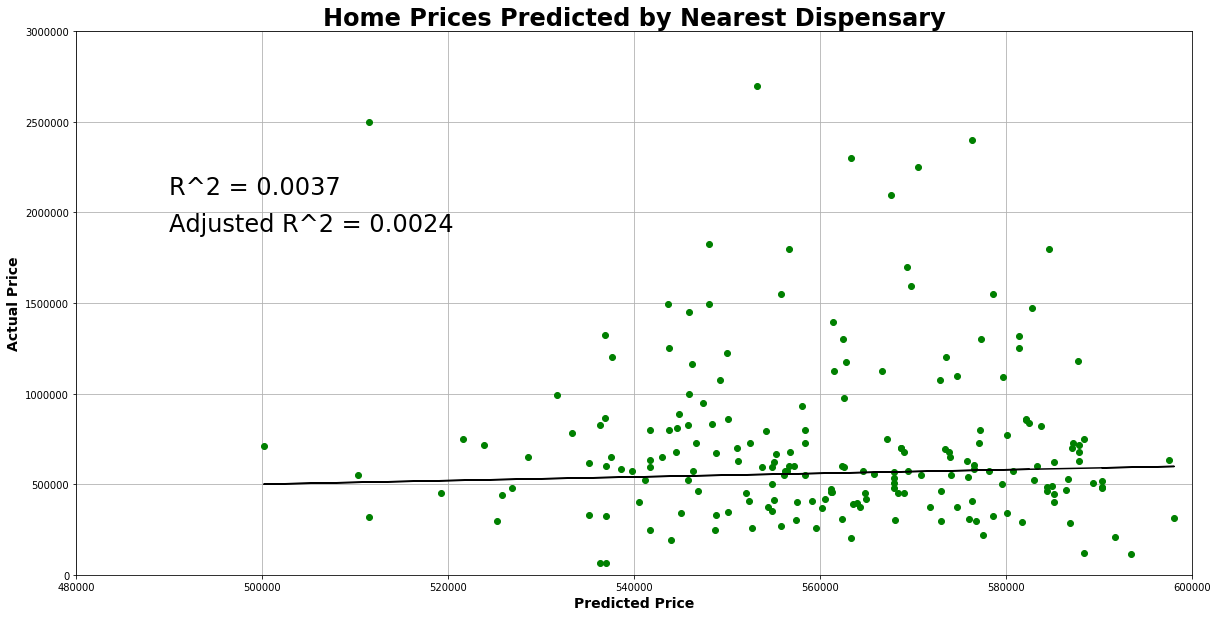

In [39]:
predictions = lr.predict(np.array(test.iloc[:][['min_dist']]).reshape(-1,1))



plt.figure(figsize=(20,10))

plt.plot(np.exp(predictions), np.exp(test['home_price']), 'go', np.exp(predictions), np.exp(predictions), 'k')
plt.title('Home Prices Predicted by Nearest Dispensary', fontsize=24, fontweight='bold')
plt.ylabel('Actual Price', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14, fontweight='bold')
plt.text(4.9e5, 2.1e6, 'R^2 = 0.0037', fontsize=24)
plt.text(4.9e5, 1.9e6, 'Adjusted R^2 = 0.0024', fontsize=24)
plt.grid()
plt.xlim(4.8e5,6e5)
plt.ylim(0,3e6)
plt.show();

In [51]:
data = np.matrix(dc[['year_built', 'min_dist', 'nn_hp_5']]).reshape(-1,3)
target = np.array(dc['home_price'])

K = 10
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

kf = KFold(n_splits=K, shuffle=True, random_state=42)

for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data, target):
        
        # split data
        X_train, X_val = data[train_index], data[val_index]
        y_train, y_val = target[train_index], target[val_index]
        
        # instantiate model
#         lr = LinearRegression(fit_intercept=True)
        lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
#         poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                    ('linear', LinearRegression(fit_intercept=False))])

        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lasso)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),8),
                 round(np.mean(validation_errors),8)))

alpha: 0.0001 | mean(train_error): 0.21690345 | mean(val_error): 0.21988082
alpha:  0.001 | mean(train_error): 0.21691103 | mean(val_error): 0.21989459
alpha:   0.01 | mean(train_error): 0.21766905 | mean(val_error): 0.22071974
alpha:    0.1 | mean(train_error): 0.27677556 | mean(val_error): 0.28000341
alpha:      1 | mean(train_error): 0.31911088 | mean(val_error): 0.32158076
alpha:   10.0 | mean(train_error): 0.3331032 | mean(val_error): 0.33404001


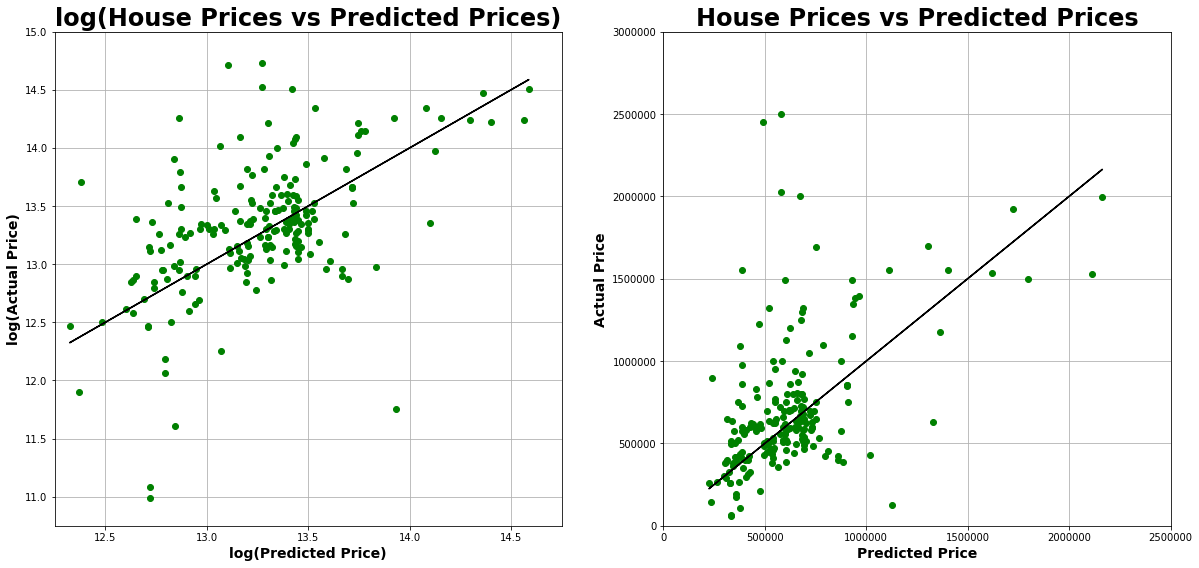

In [57]:
predictions = poly.predict(np.array(test.iloc[:][['year_built', 'min_dist', 'nn_hp_5']]).reshape(-1,3))


plt.figure(figsize=(20,20))


plt.subplot(221)
plt.plot(predictions, test['home_price'], 'go', predictions, predictions, 'k')
plt.title('log(House Prices vs Predicted Prices)', fontsize=24, fontweight='bold')
plt.ylabel('log(Actual Price)', fontsize=14, fontweight='bold')
plt.xlabel('log(Predicted Price)', fontsize=14, fontweight='bold')
plt.grid()
plt.xlim(12.25,14.75)
plt.ylim(10.75,15)


plt.subplot(222)
plt.plot(np.exp(predictions), np.exp(test['home_price']), 'go', np.exp(predictions), np.exp(predictions), 'k')
plt.title('House Prices vs Predicted Prices', fontsize=24, fontweight='bold')
plt.ylabel('Actual Price', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14, fontweight='bold')
plt.grid()
plt.xlim(0,2.5e6)
plt.ylim(0,3e6)


plt.show();

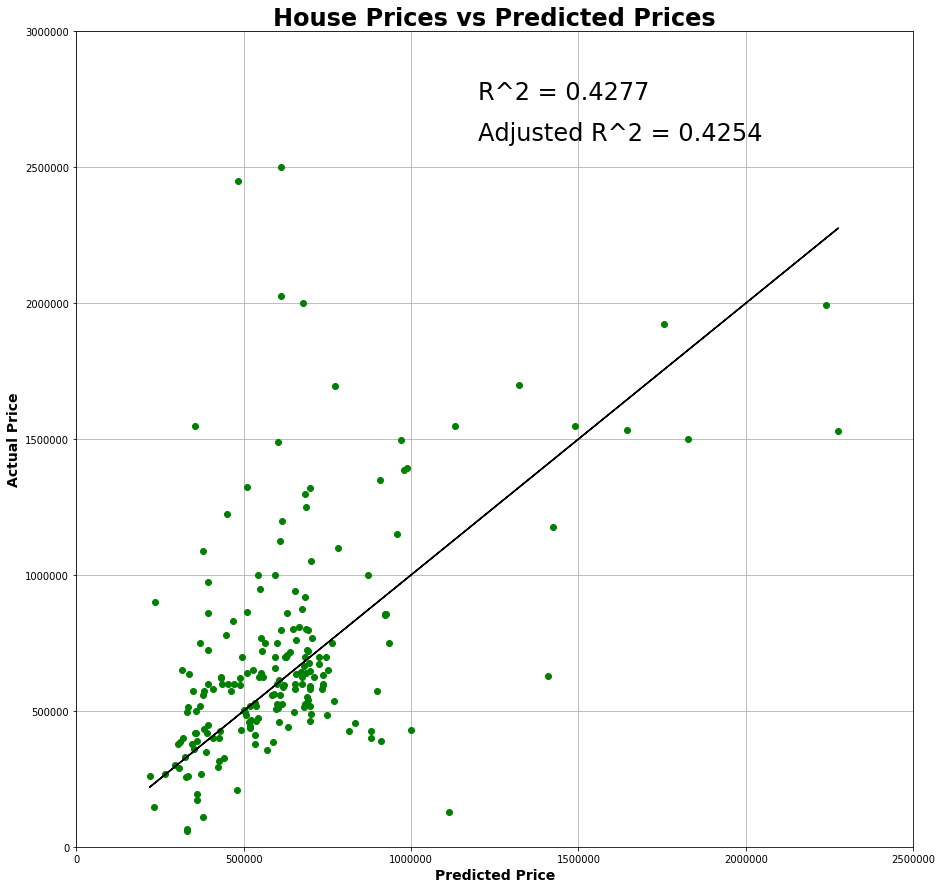

In [82]:
predictions = poly.predict(np.array(test.iloc[:][['year_built', 'min_dist', 'nn_hp_5']]).reshape(-1,3))



plt.figure(figsize=(15,15))

plt.plot(np.exp(predictions), np.exp(test['home_price']), 'go', np.exp(predictions), np.exp(predictions), 'k')
plt.title('House Prices vs Predicted Prices', fontsize=24, fontweight='bold')
plt.ylabel('Actual Price', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14, fontweight='bold')
plt.text(1.2e6, 2.75e6, 'R^2 = 0.4277', fontsize=24)
plt.text(1.2e6, 2.6e6, 'Adjusted R^2 = 0.4254', fontsize=24)
plt.grid()
plt.xlim(0,2.5e6)
plt.ylim(0,3e6)
plt.show();

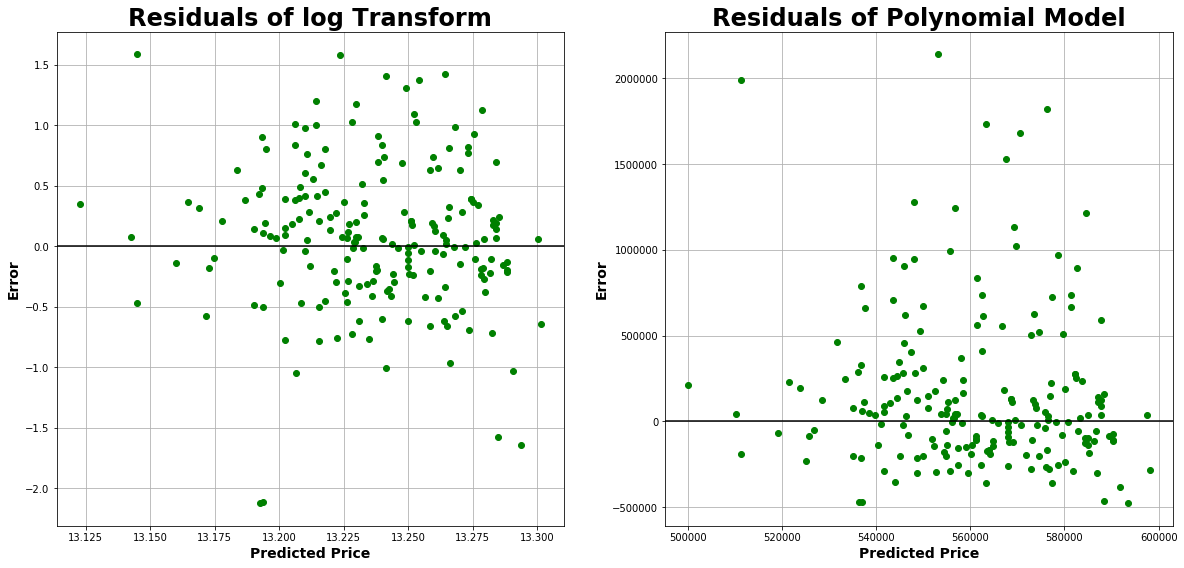

In [48]:
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.plot(predictions, test['home_price']-predictions, 'go')
plt.axhline(y=0, color='k')
plt.grid()
plt.title('Residuals of log Transform', fontsize=24, fontweight='bold')
plt.ylabel('Error', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14, fontweight='bold')


plt.subplot(222)
plt.plot(np.exp(predictions), np.exp(test['home_price'])-np.exp(predictions), 'go')
plt.axhline(y=0, color='k')
plt.grid()
plt.title('Residuals of Polynomial Model', fontsize=24, fontweight='bold')
plt.ylabel('Error', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14, fontweight='bold')
plt.show();